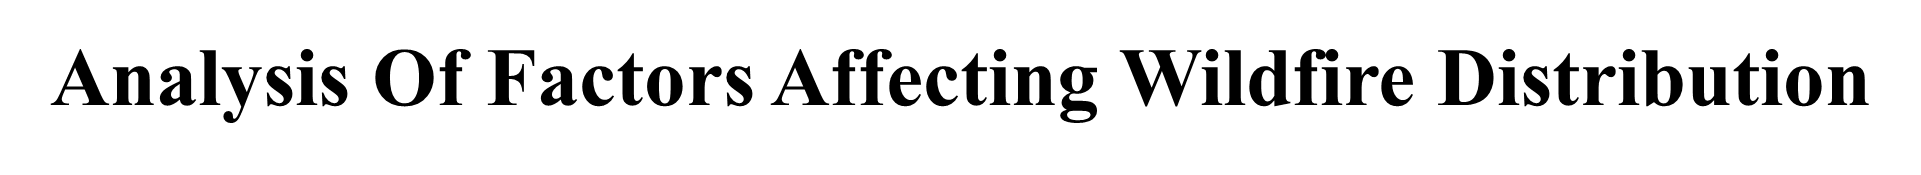


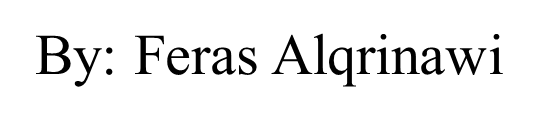


## Table of Contents
1. Introduction
2. Data Loading and Preprocessing
3. Exploratory Data Analysis
4. Model Building
5. Results


## Introduction

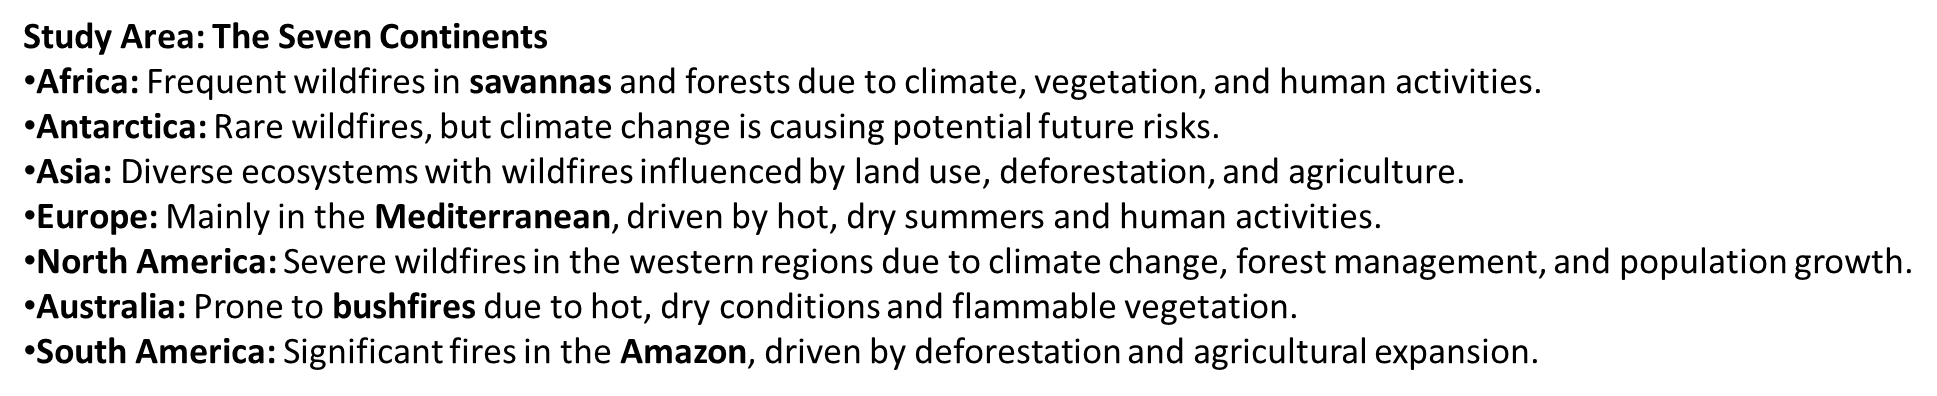

## Data Loading and Preprocessing
Description of data sources and preprocessing steps.

In [33]:
# Data manipulation
import pandas as pd
import numpy as np

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.decomposition import PCA

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Metrics
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score, roc_auc_score)
from sklearn.inspection import permutation_importance
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
# Load the datasets
df = pd.read_csv('Final.csv')
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
df

,system:index,Aspect,HumanImpactIndexMean,LandCover,NDMI,NDVI,Precipitation,Slope,SoilMoist,TempMax,...,.geo,burned,RelativeHumidity,Elevation,FuelLoad,FuelMoistureContent,SolarRadiation,LightningFrequency,Evapotranspiration,PopulationDensity
0,2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_...,305.770089,2684.759255,9.900299,0.048615,0.226651,6.837677,5.895801,2.027484,277.812739,...,"{""type"":""MultiPoint"",""coordinates"":[]}",0,-591.429417,852.698682,2.335487,0.275858,281.133958,0.060257,261.900486,79.941437
1,2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_...,19.024028,2857.690056,10.420384,-0.162448,0.453115,146.201685,3.080923,1319.398203,151.644375,...,"{""type"":""MultiPoint"",""coordinates"":[]}",1,-253.299405,1715.906963,4.217666,2531.177523,215.706100,8.264681,306.460348,167.619250
2,2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_...,111.746056,755.850000,7.000000,0.012532,0.147763,2.384615,0.156462,29.454545,367.500000,...,"{""type"":""MultiPoint"",""coordinates"":[]}",1,75.455224,15.646169,8.000000,29.454545,292.750000,0.238462,292.511538,75.585000
3,2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_...,335.646100,89.800000,9.000000,0.084230,0.442935,64.000000,0.986172,483.500000,289.500000,...,"{""type"":""MultiPoint"",""coordinates"":[]}",1,98.777090,98.617190,10.000000,483.500000,230.250000,6.400000,223.850000,8.980000
4,2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_1_5_0,48.775370,112.100000,16.000000,-0.125056,0.159776,0.000000,0.131943,0.000000,334.666667,...,"{""type"":""MultiPoint"",""coordinates"":[]}",0,-723.333333,13.194299,5.000000,0.000000,252.333333,0.000000,252.333333,11.210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_1_1_0,154.764052,1239.586757,2.776492,-0.074953,0.536410,84.983425,18.750428,1030.718876,194.605435,...,"{""type"":""MultiPoint"",""coordinates"":[]}",1,36.616979,745.996702,7.811160,3847.239520,135.653302,13.596138,233.080471,27.218124
996,2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_...,270.000000,704.750000,7.000000,-0.114405,0.270242,19.500000,0.359687,4.000000,290.500000,...,"{""type"":""MultiPoint"",""coordinates"":[]}",1,-72.500000,35.968688,8.000000,4.000000,204.250000,1.950000,202.300000,70.475000
997,2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_...,262.278160,2143.540276,15.726610,0.196733,0.215541,210.446206,19.406737,334.240193,174.738897,...,"{""type"":""MultiPoint"",""coordinates"":[]}",1,-326.406697,915.008213,3.571229,2041.281048,157.297168,8.905746,92.255864,279.144674
998,2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_2_...,123.909940,7.200000,16.000000,0.065446,0.044671,1.076271,4.045609,0.000000,274.000000,...,"{""type"":""MultiPoint"",""coordinates"":[]}",0,-720.000000,404.560850,5.000000,0.000000,192.000000,0.107627,191.892373,0.720000


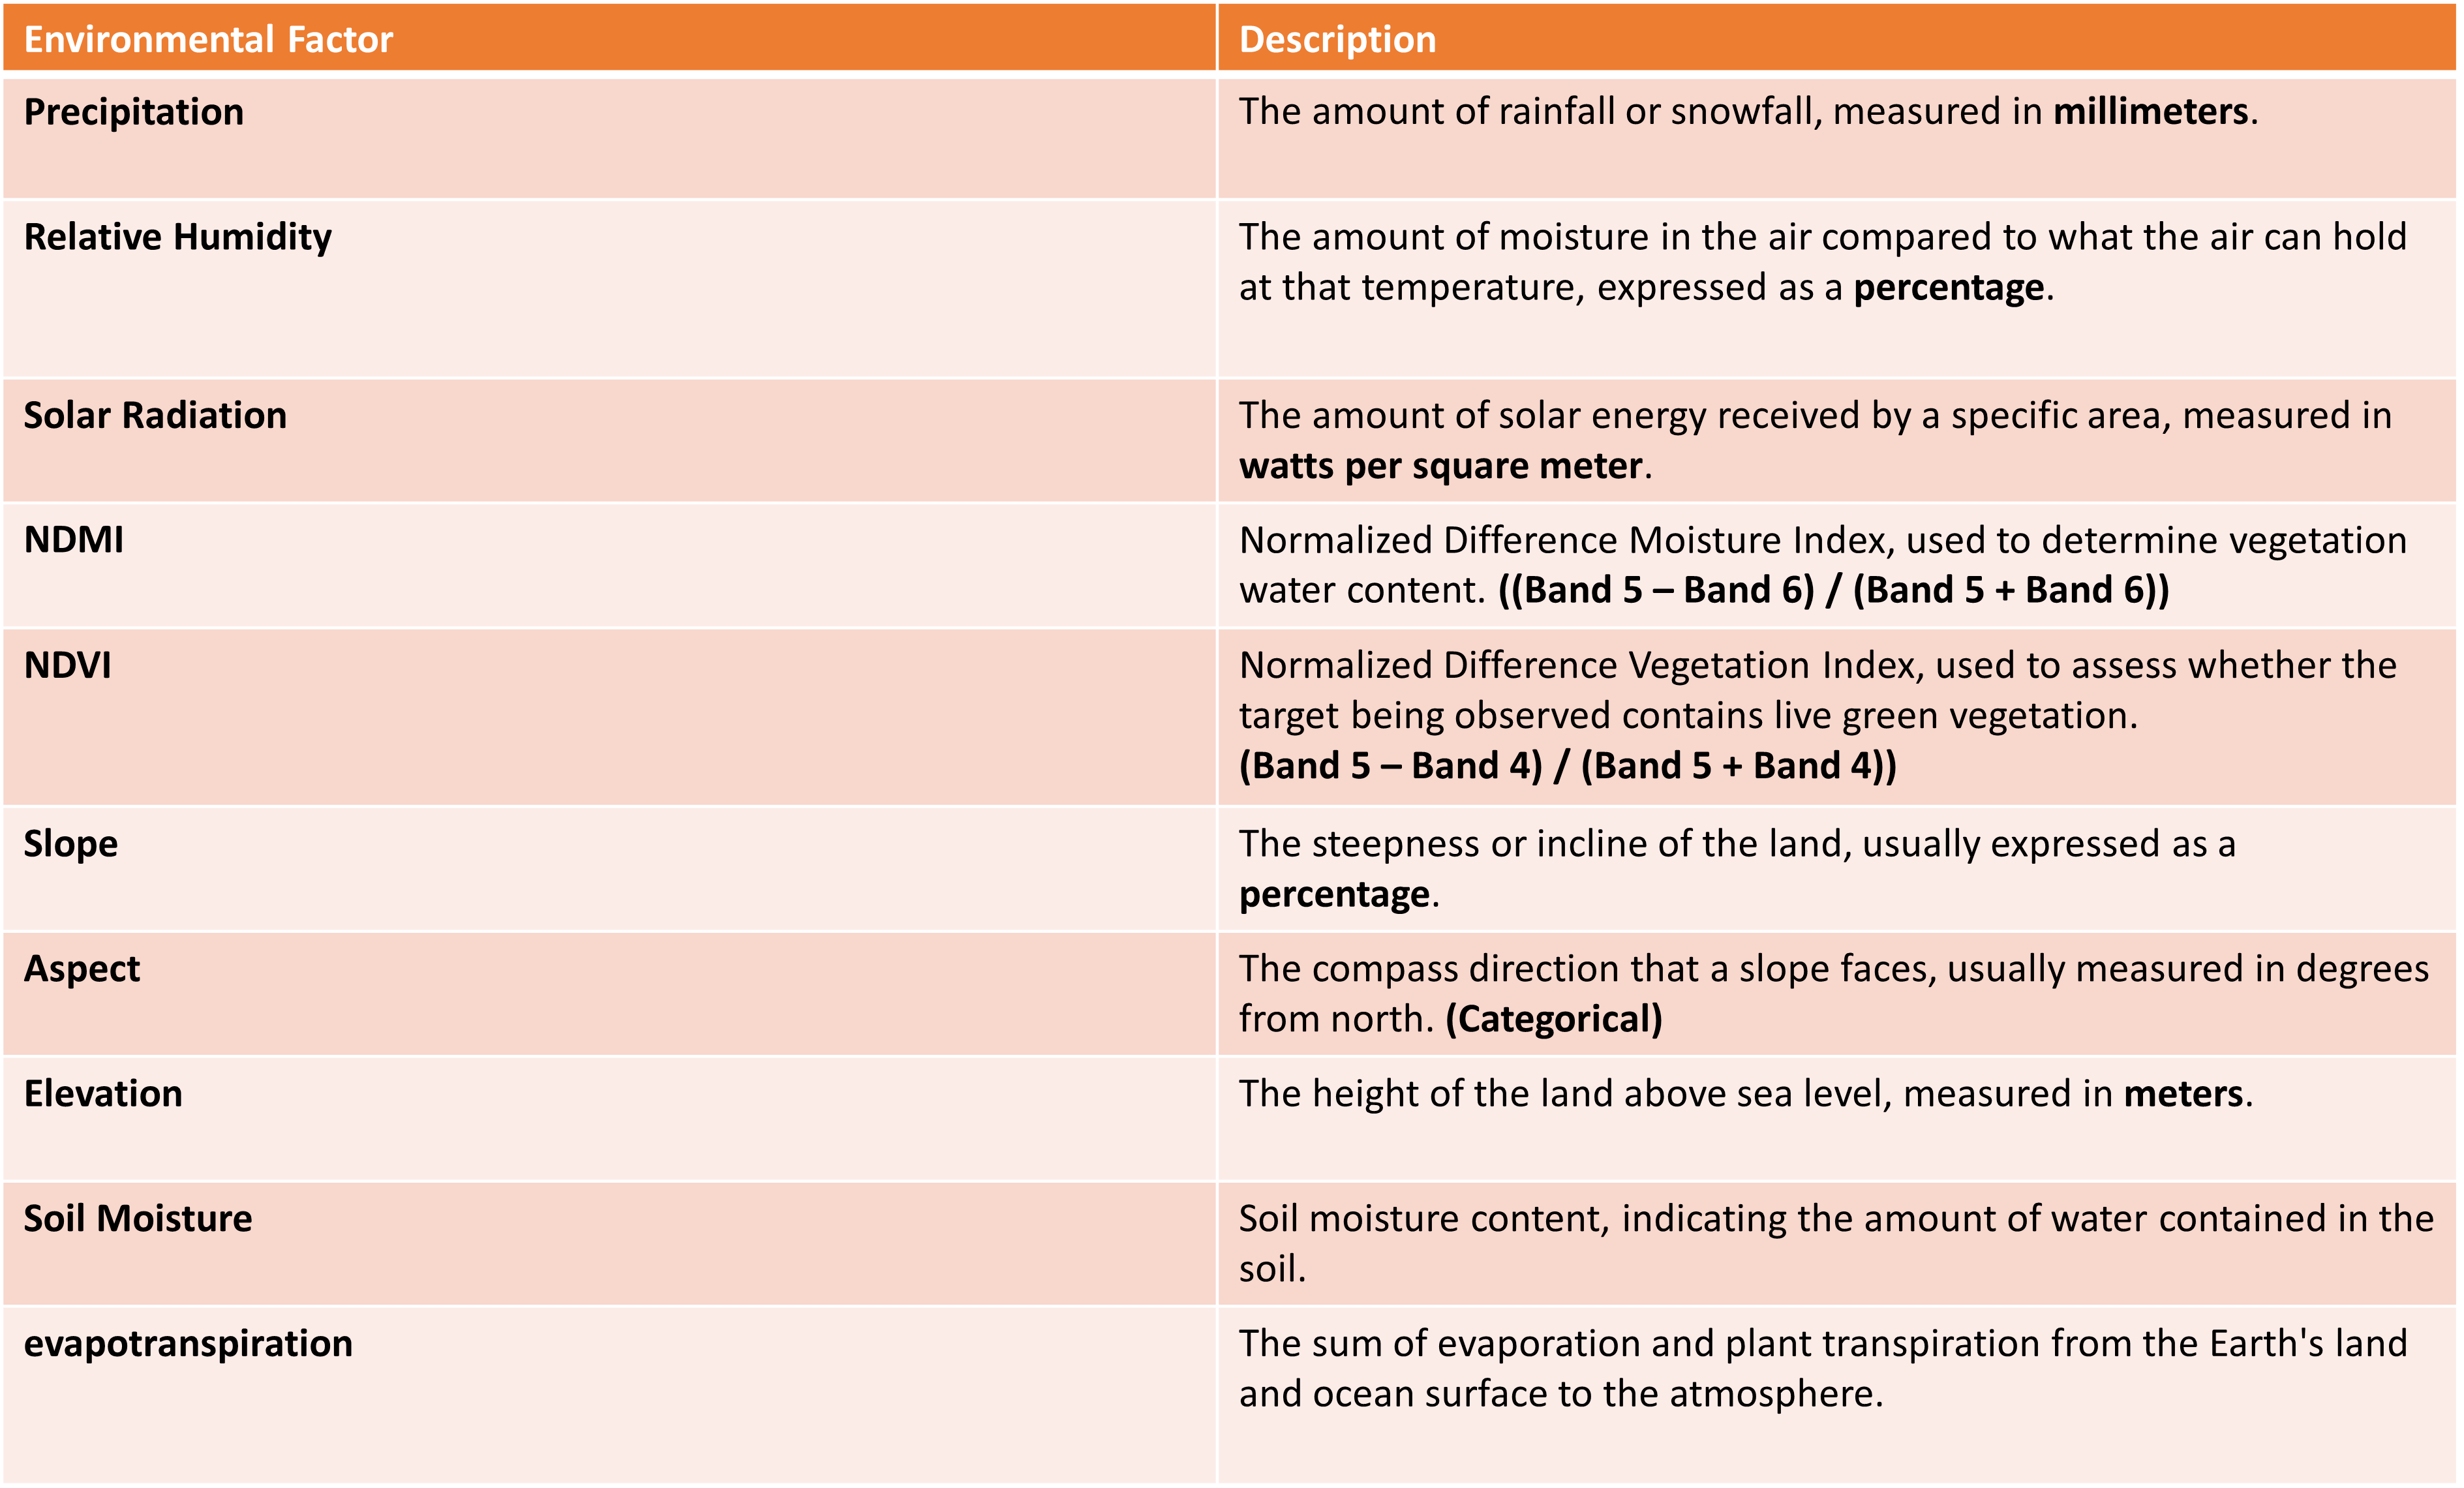

## Exploratory Data Analysis
Insights and visualizations from the data.

In [35]:
# Display basic information about the dataset
df_info = df.info()
# Generate summary statistics
summary_stats = df.describe()

# Check for missing values
missing_values = df.isnull().sum()
df_info, missing_values, summary_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   system:index          1000 non-null   object 
 1   Aspect                1000 non-null   float64
 2   HumanImpactIndexMean  1000 non-null   float64
 3   LandCover             1000 non-null   float64
 4   NDMI                  1000 non-null   float64
 5   NDVI                  1000 non-null   float64
 6   Precipitation         1000 non-null   float64
 7   Slope                 1000 non-null   float64
 8   SoilMoist             1000 non-null   float64
 9   TempMax               1000 non-null   float64
 10  TempMin               1000 non-null   float64
 11  WaterDeficit          1000 non-null   float64
 12  WindSpeed             1000 non-null   float64
 13  idx                   1000 non-null   float64
 14  .geo                  1000 non-null   object 
 15  burned                

(None,
 system:index            0
 Aspect                  0
 HumanImpactIndexMean    0
 LandCover               0
 NDMI                    0
 NDVI                    0
 Precipitation           0
 Slope                   0
 SoilMoist               0
 TempMax                 0
 TempMin                 0
 WaterDeficit            0
 WindSpeed               0
 idx                     0
 .geo                    0
 burned                  0
 RelativeHumidity        0
 Elevation               0
 FuelLoad                0
 FuelMoistureContent     0
 SolarRadiation          0
 LightningFrequency      0
 Evapotranspiration      0
 PopulationDensity       0
 dtype: int64,
             Aspect  HumanImpactIndexMean    LandCover         NDMI  \
 count  1000.000000           1000.000000  1000.000000  1000.000000   
 mean    177.838836            961.521698    12.019605    -0.002103   
 std     104.006967            845.580150     4.028823     0.154017   
 min       0.000000              0.000000     

In [36]:
# Drop irrelevant columns
df_cleaned = df.drop(columns=[ '.geo', 'system:index','idx'])
df_cleaned

,Aspect,HumanImpactIndexMean,LandCover,NDMI,NDVI,Precipitation,Slope,SoilMoist,TempMax,TempMin,...,WindSpeed,burned,RelativeHumidity,Elevation,FuelLoad,FuelMoistureContent,SolarRadiation,LightningFrequency,Evapotranspiration,PopulationDensity
0,305.770089,2684.759255,9.900299,0.048615,0.226651,6.837677,5.895801,2.027484,277.812739,149.574820,...,398.216349,0,-591.429417,852.698682,2.335487,0.275858,281.133958,0.060257,261.900486,79.941437
1,19.024028,2857.690056,10.420384,-0.162448,0.453115,146.201685,3.080923,1319.398203,151.644375,239.428238,...,319.885889,1,-253.299405,1715.906963,4.217666,2531.177523,215.706100,8.264681,306.460348,167.619250
2,111.746056,755.850000,7.000000,0.012532,0.147763,2.384615,0.156462,29.454545,367.500000,218.000000,...,291.250000,1,75.455224,15.646169,8.000000,29.454545,292.750000,0.238462,292.511538,75.585000
3,335.646100,89.800000,9.000000,0.084230,0.442935,64.000000,0.986172,483.500000,289.500000,171.000000,...,219.000000,1,98.777090,98.617190,10.000000,483.500000,230.250000,6.400000,223.850000,8.980000
4,48.775370,112.100000,16.000000,-0.125056,0.159776,0.000000,0.131943,0.000000,334.666667,170.000000,...,436.000000,0,-723.333333,13.194299,5.000000,0.000000,252.333333,0.000000,252.333333,11.210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,154.764052,1239.586757,2.776492,-0.074953,0.536410,84.983425,18.750428,1030.718876,194.605435,112.385782,...,209.040646,1,36.616979,745.996702,7.811160,3847.239520,135.653302,13.596138,233.080471,27.218124
996,270.000000,704.750000,7.000000,-0.114405,0.270242,19.500000,0.359687,4.000000,290.500000,118.000000,...,277.500000,1,-72.500000,35.968688,8.000000,4.000000,204.250000,1.950000,202.300000,70.475000
997,262.278160,2143.540276,15.726610,0.196733,0.215541,210.446206,19.406737,334.240193,174.738897,99.928840,...,282.089634,1,-326.406697,915.008213,3.571229,2041.281048,157.297168,8.905746,92.255864,279.144674
998,123.909940,7.200000,16.000000,0.065446,0.044671,1.076271,4.045609,0.000000,274.000000,110.000000,...,311.000000,0,-720.000000,404.560850,5.000000,0.000000,192.000000,0.107627,191.892373,0.720000


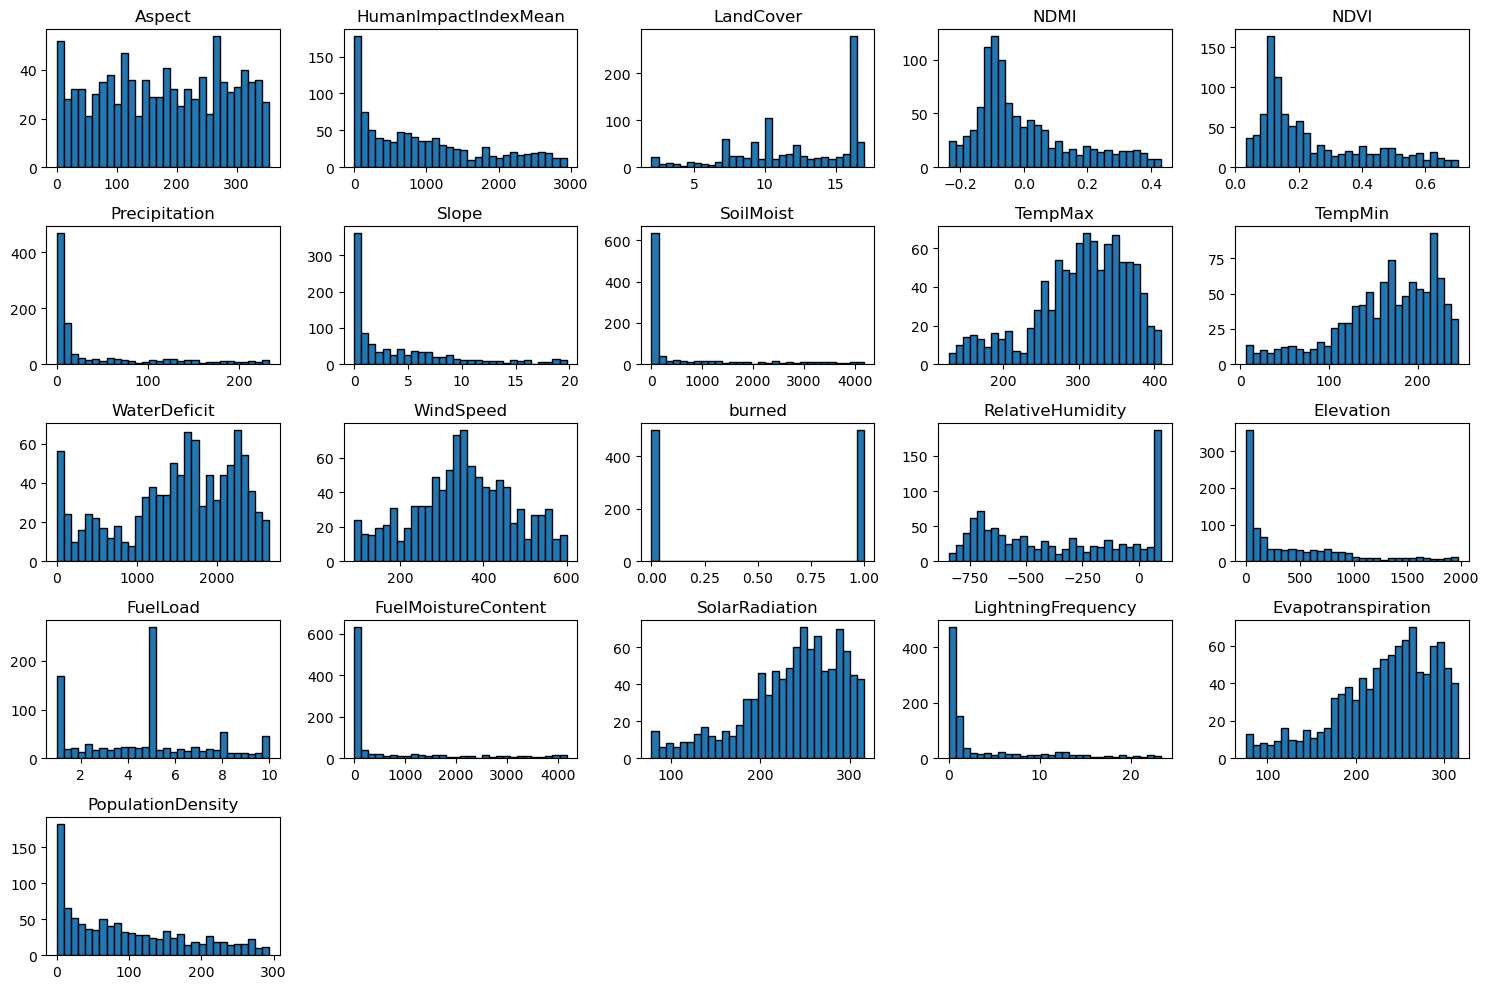

In [37]:
# Plot histograms for numerical features
numeric_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(5, 5, i)
    plt.hist(df_cleaned[col], bins=30, edgecolor='k')
    plt.title(col)
plt.tight_layout()
plt.show()


**Aspect**: The distribution appears uniform, indicating a relatively even spread of data across different orientations.

**HumanImpactIndexMean**: The majority of values are clustered at the lower end, suggesting that most areas have low human impact.

**LandCover**: There are significant peaks at certain values, indicating dominant land cover types.

**NDMI**: The values are normally distributed, with a peak around zero.

**NDVI**: The distribution is skewed, with a higher frequency of lower values, indicating more areas with low vegetation density.

**Precipitation**: Most values are concentrated at the lower end, indicating that many areas receive low precipitation.

**Slope**: The distribution shows a high frequency of low slope values, suggesting that many areas are relatively flat.

**SoilMoist**: A large number of values are clustered at the lower end, indicating low soil moisture in many areas.

**TempMax and TempMin**: Both variables show normal distributions, with peaks around their respective means.

**WaterDeficit**: The distribution is relatively even, with no significant peaks.

**WindSpeed**: The data is normally distributed, with a peak around the mid-range values.

**burned**: There are clear peaks at 0 and 1, indicating binary data for burned areas.

**RelativeHumidity**: The distribution is skewed, with a higher frequency of lower values.

**Elevation**: Most values are concentrated at the lower end, indicating many areas are at low elevation.

**FuelLoad**: The distribution shows a high frequency of lower values, indicating low fuel loads in most areas.

**FuelMoistureContent**: The majority of values are at the lower end, suggesting low moisture content in fuels.

**SolarRadiation**: The data is evenly distributed with a slight peak around the mid-range values.

**LightningFrequency**: Most values are clustered at the lower end, indicating low lightning frequency.

**Evapotranspiration**: The distribution is skewed with a peak at the higher end, indicating high evapotranspiration in many areas.

**PopulationDensity**: The values are concentrated at the lower end, suggesting low population density in most areas.


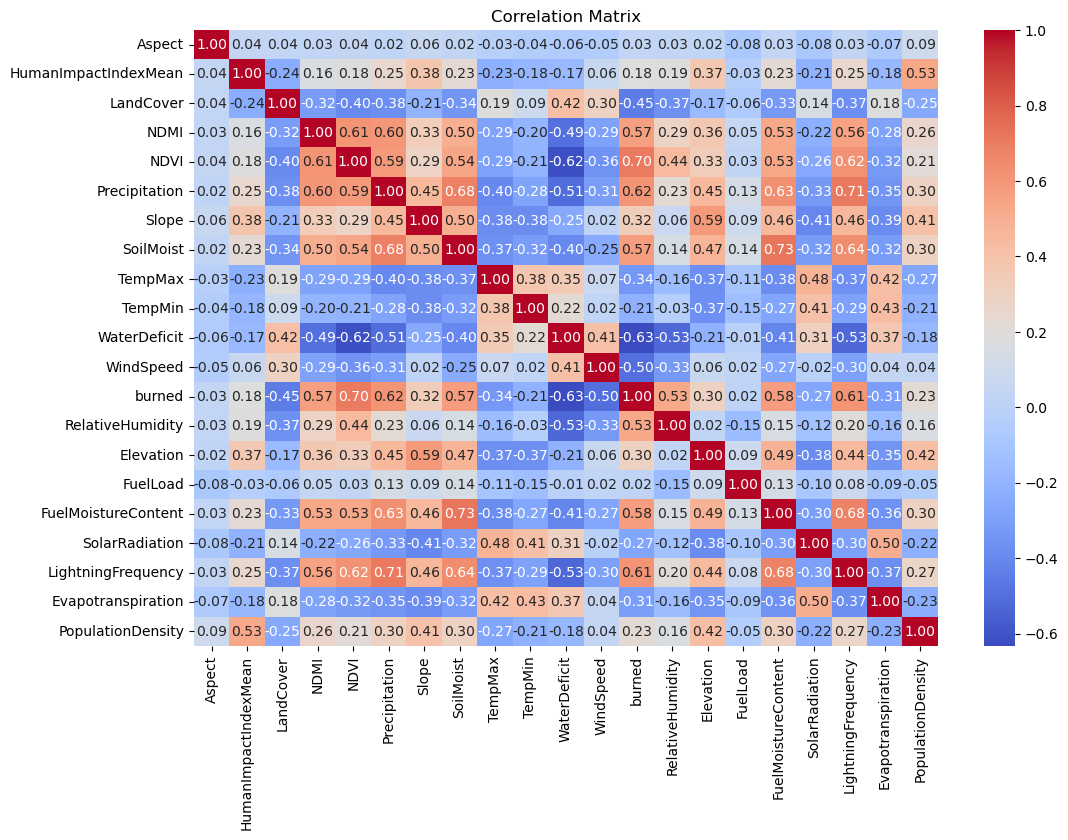

In [38]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

1. **Strong Positive Correlations**:
   - **NDVI and Precipitation** (0.59): Higher vegetation density is associated with higher precipitation.
   - **NDVI and SoilMoist** (0.73): Areas with higher vegetation density tend to have higher soil moisture.
   - **WaterDeficit and Precipitation** (0.51): Areas with higher precipitation tend to have lower water deficit.
   - **TempMax and TempMin** (0.81): Maximum and minimum temperatures are strongly correlated.
   - **FuelMoistureContent and SoilMoist** (0.58): Higher soil moisture is associated with higher fuel moisture content.
   - **SolarRadiation and Evapotranspiration** (0.50): Higher solar radiation is associated with higher evapotranspiration.
   - **PopulationDensity and HumanImpactIndexMean** (0.53): Higher population density is associated with higher human impact.

2. **Strong Negative Correlations**:
   - **NDVI and TempMax** (-0.29): Higher vegetation density is associated with lower maximum temperatures.
   - **WaterDeficit and SoilMoist** (-0.62): Higher water deficit is associated with lower soil moisture.
   - **RelativeHumidity and TempMax** (-0.37): Higher relative humidity is associated with lower maximum temperatures.
   - **Evapotranspiration and SoilMoist** (-0.39): Higher evapotranspiration is associated with lower soil moisture.

3. **Interesting Patterns**:
   - **HumanImpactIndexMean and LandCover** (0.24): Areas with higher human impact tend to have distinct land cover types.
   - **NDMI and NDVI** (0.61): Strong positive correlation, indicating a relationship between vegetation indices.
   - **FuelLoad and SoilMoist** (0.09): Relatively weak correlation, suggesting fuel load is less dependent on soil moisture.


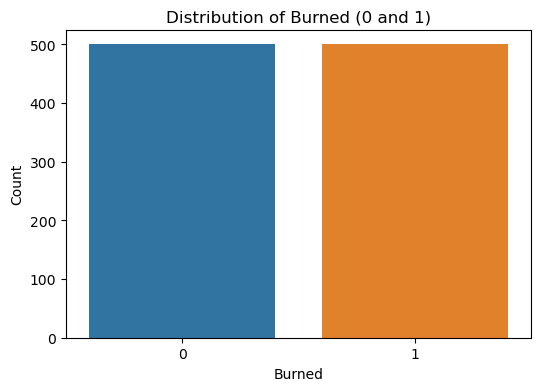

In [39]:

# Visualize the distribution of the target variable 'burned' (0 and 1)
plt.figure(figsize=(6, 4))
sns.countplot(x=df_cleaned['burned'])
plt.title('Distribution of Burned (0 and 1)')
plt.xlabel('Burned')
plt.ylabel('Count')
plt.show()


# Model Building
## Step 1: Data Preparation
Data Splitting: Split the data into training and testing sets.

Feature Scaling: Standardize or normalize the features to ensure that they have similar scales.

In [60]:
# Separate features and target
X = df_cleaned.drop(columns=['burned'])
y = df_cleaned['burned']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 20), (200, 20), (800,), (200,))

## Step 2: Model Selection
#### Select different machine learning algorithms to train on the dataset.

**Logistic Regression**: A linear model used for binary classification problems.

**Random Forest Classifier**: An ensemble method that combines multiple decision trees to improve accuracy and control overfitting.

**Gradient Boosting Classifier**: An ensemble technique that builds trees sequentially to correct the errors of the previous trees.

**Support Vector Machine (SVM)**: A classification method that finds the hyperplane that best separates the data into classes.

**XGBoost Classifier**: An efficient and scalable implementation of gradient boosting that is widely used in competitions and practical applications.

**+Neural Network**: A model inspired by the human brain, suitable for capturing complex patterns in data.


### Step 3: Model Training
**Train Models**: Fit the selected models on the training data.

In [62]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [42]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
gb = GradientBoostingClassifier(max_depth=25,random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=25, random_state=42)

In [44]:
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [45]:
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Step 4: Model Evaluation
**Predictions**: Use the trained models to make predictions on the test data.

**Performance Metrics**: Evaluate the performance of the models using appropriate metrics such as accuracy, precision, recall, F1 score, ROC-AUC, etc.

In [46]:
def visualize_model_performance(models, X_test, y_test, model_names):
    plt.figure(figsize=(10, 8))

    for model, name in zip(models, model_names):
        # Make predictions
        y_prob = model.predict_proba(X_test)[:, 1]

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    # Confusion Matrix for each model
    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        cm_display.plot(cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.show()

        # Print classification report
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(report)
        print("\n" + "="*60 + "\n")

# List of models and their names
models = [log_reg, rf, gb, svm, xgboost]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting','SVM', 'XGBoost']

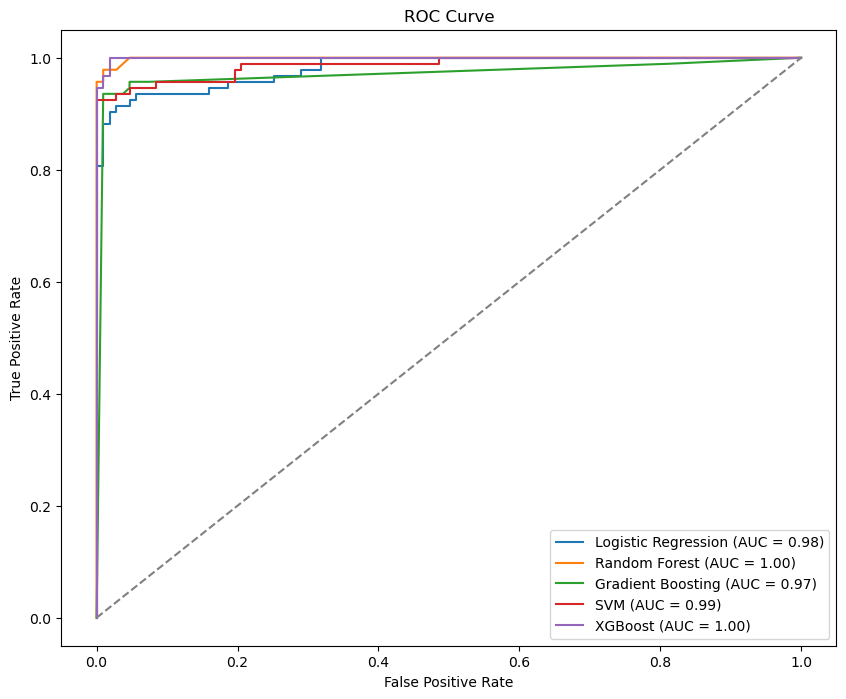

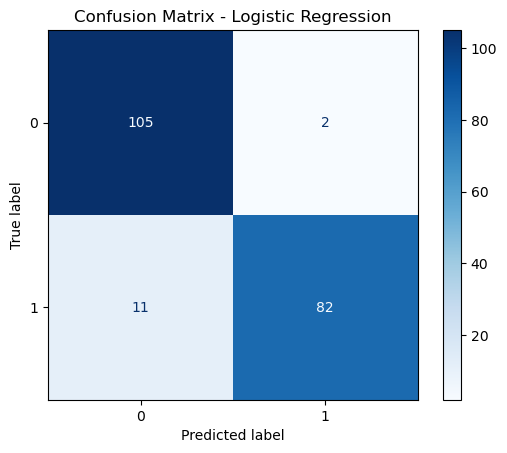

Model: Logistic Regression
Accuracy: 0.9350
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       107
           1       0.98      0.88      0.93        93

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200





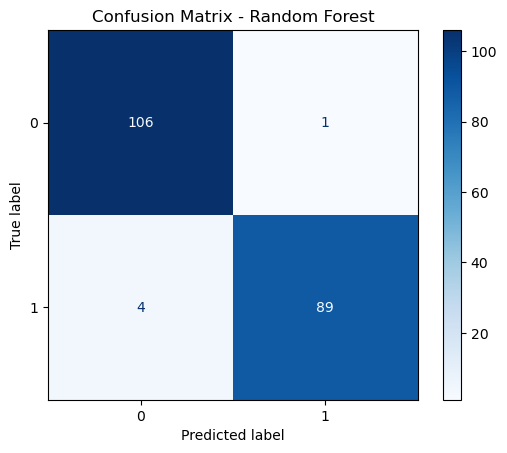

Model: Random Forest
Accuracy: 0.9750
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.99      0.96      0.97        93

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200





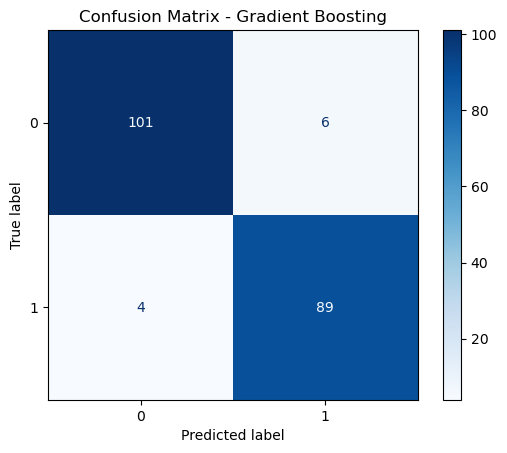

Model: Gradient Boosting
Accuracy: 0.9500
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       107
           1       0.94      0.96      0.95        93

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200





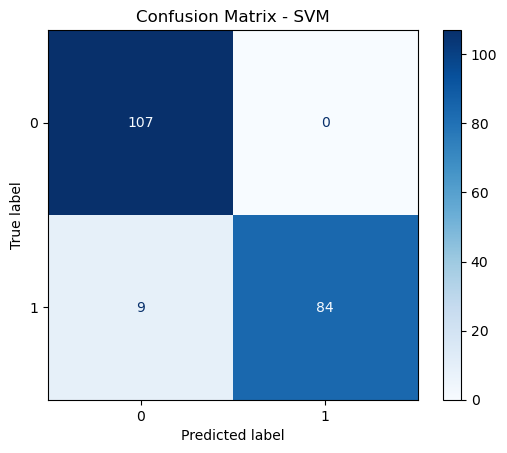

Model: SVM
Accuracy: 0.9550
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       107
           1       1.00      0.90      0.95        93

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200





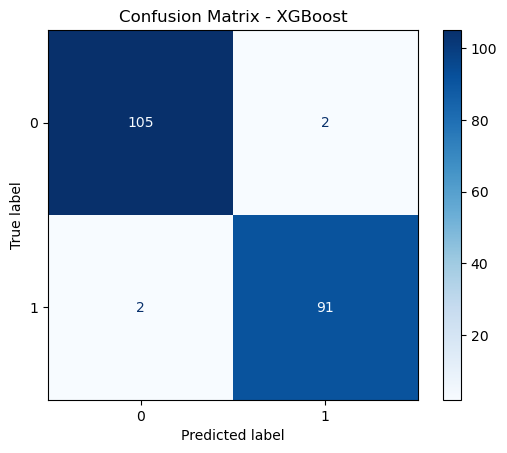

Model: XGBoost
Accuracy: 0.9800
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       107
           1       0.98      0.98      0.98        93

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200





In [47]:
# Visualize the performance of all models
visualize_model_performance(models, X_test, y_test, model_names)

## Model Training with Cross-Validation
**Cross-validation is a technique to assess how the results of a statistical analysis will generalize to an independent dataset.**

***overfitting check***

In [48]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=500),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
# Calculate cross-validation scores
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=4, scoring='accuracy')
    cv_results[name] = {
        'Accuracy (Mean)': scores.mean(),
        'Accuracy (Std)': scores.std()
    }

# Create a summary DataFrame
result_summary = pd.DataFrame(cv_results).T
result_summary.reset_index(inplace=True)
result_summary.rename(columns={'index': 'Model'}, inplace=True)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


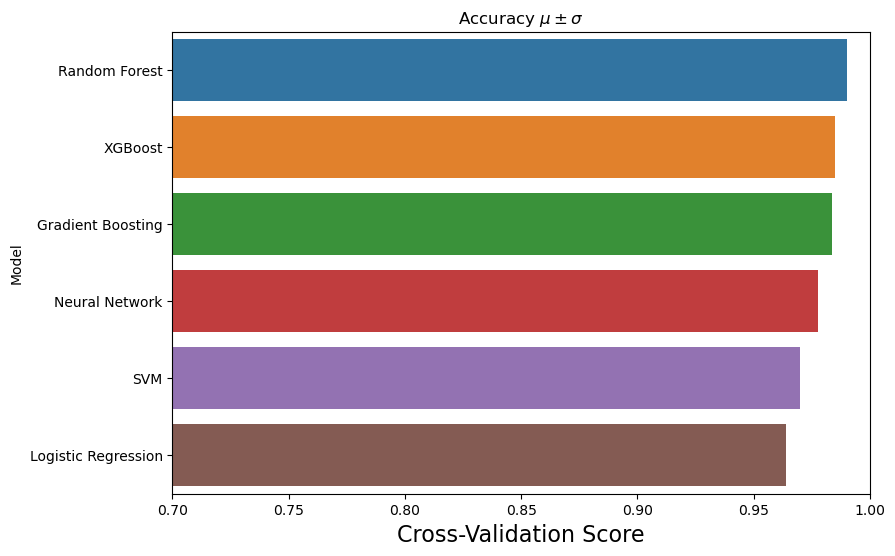

In [49]:
# Sort the summary DataFrame by accuracy mean
result_summary.sort_values(by=['Accuracy (Mean)'], ascending=False, inplace=True)

# Create the plot
f, axe = plt.subplots(1, 1, figsize=(9, 6))

sns.barplot(x='Accuracy (Mean)', y='Model', data=result_summary, ax=axe, capsize=0.1)
axe.set_xlabel('Cross-Validation Score', size=16)
axe.set_ylabel('Model')
axe.set_title("Accuracy $\mu \pm \sigma$")
axe.set_xlim(0.7, 1)
plt.show()

***The mean cross-validation score is very close to the training accuracy (98.9%), and the standard deviation is relatively low, indicating that the model is performing consistently across different folds and is not overfitting.**

##### *Function to visualize feature importances*

In [50]:
def plot_permutation_importance(model, X, y, feature_names, top_n=5, n_repeats=30, random_state=42):
    """
    Calculate and plot the top n permutation feature importances for a given model.
    
    Parameters:
    model: The trained model
    X: Features dataset (test set)
    y: Target variable (test set)
    feature_names: List of feature names
    top_n: Number of top features to display
    n_repeats: Number of times to permute a feature
    random_state: Random state for reproducibility
    
    Returns:
    A DataFrame with the top n features and their importances
    """
    # Calculate permutation feature importance
    r = permutation_importance(model, X, y, n_repeats=n_repeats, random_state=random_state, n_jobs=-1)
    
    # Get the mean importances
    feature_importances = r.importances_mean

    # Create a DataFrame for feature importances
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    # Get the top n important features
    top_features = feature_importance_df.head(top_n)
    
    # Visualize the top n feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
    plt.title(f'Top {top_n} Feature Importances ')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
    
    # Return the DataFrame with the top important features
    return top_features

## Results
Presentation and interpretation of the results.

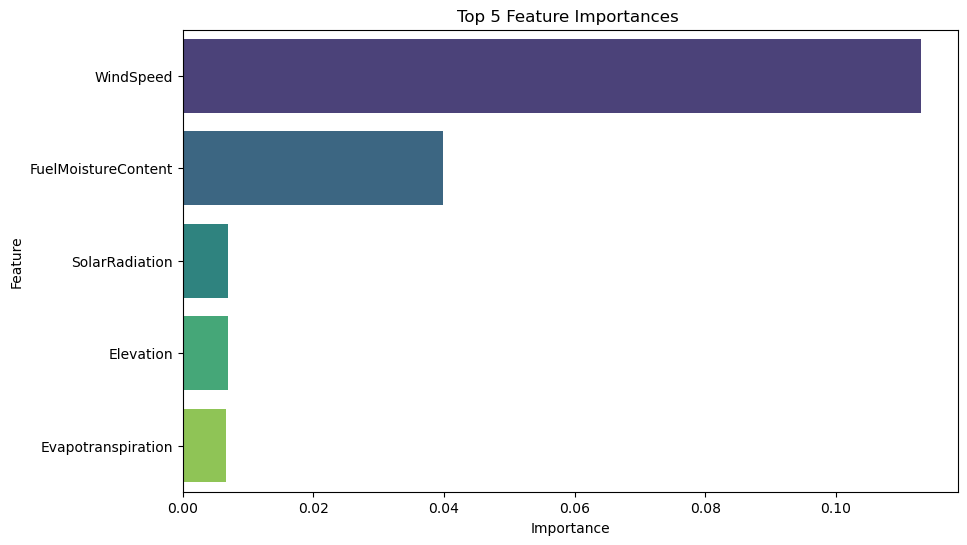

,Feature,Importance
11,WindSpeed,0.113000
15,FuelMoistureContent,0.039833
16,SolarRadiation,0.007000
13,Elevation,0.007000
18,Evapotranspiration,0.006667


In [67]:
# Extract feature names
feature_names = X.columns

# Get and plot the top features from Random Forest
top_features_rf = plot_permutation_importance(rf,X_test, y_test, X.columns, top_n=5)
top_features_rf

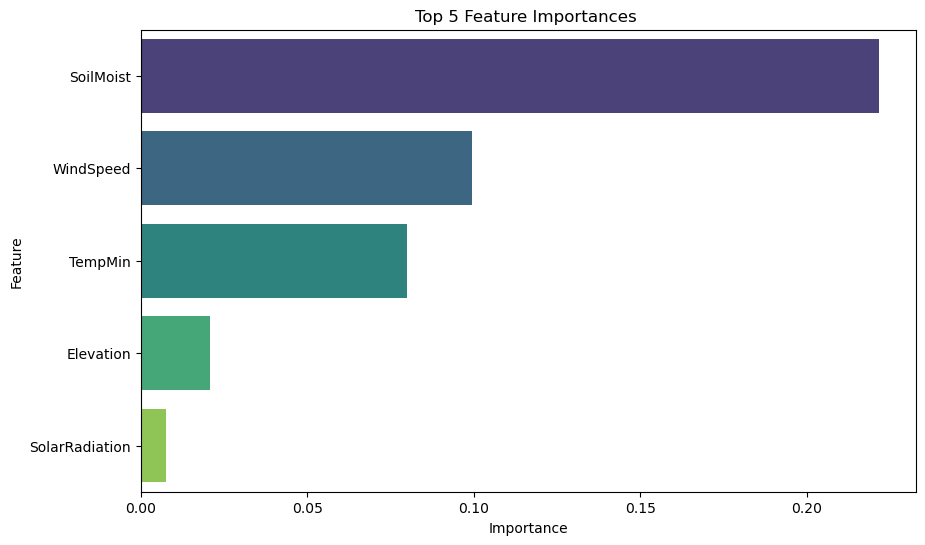

,Feature,Importance
7,SoilMoist,0.221667
11,WindSpeed,0.099333
9,TempMin,0.079833
13,Elevation,0.020833
16,SolarRadiation,0.007667


In [69]:

# Get and plot the top features from Gb
top_features_gb = plot_permutation_importance(gb,X_test, y_test, X.columns, top_n=5)
top_features_gb

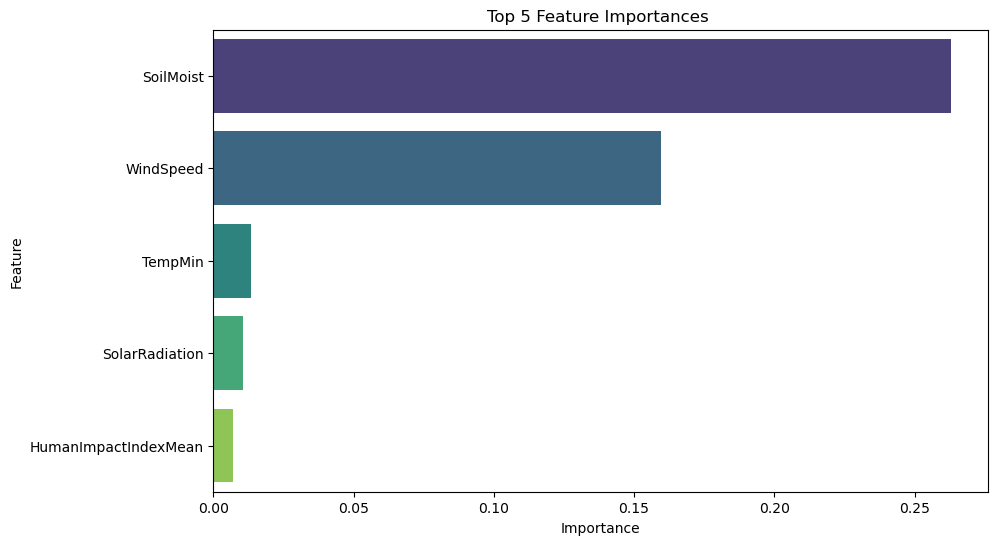

,Feature,Importance
7,SoilMoist,0.263167
11,WindSpeed,0.159500
9,TempMin,0.013500
16,SolarRadiation,0.010500
1,HumanImpactIndexMean,0.006833


In [63]:
# Get and plot the top features from xgboost
top_features_nn = plot_permutation_importance(xgboost,X_test, y_test, X.columns, top_n=5)
top_features_nn

## Bouns Model : Artifical Neural Network

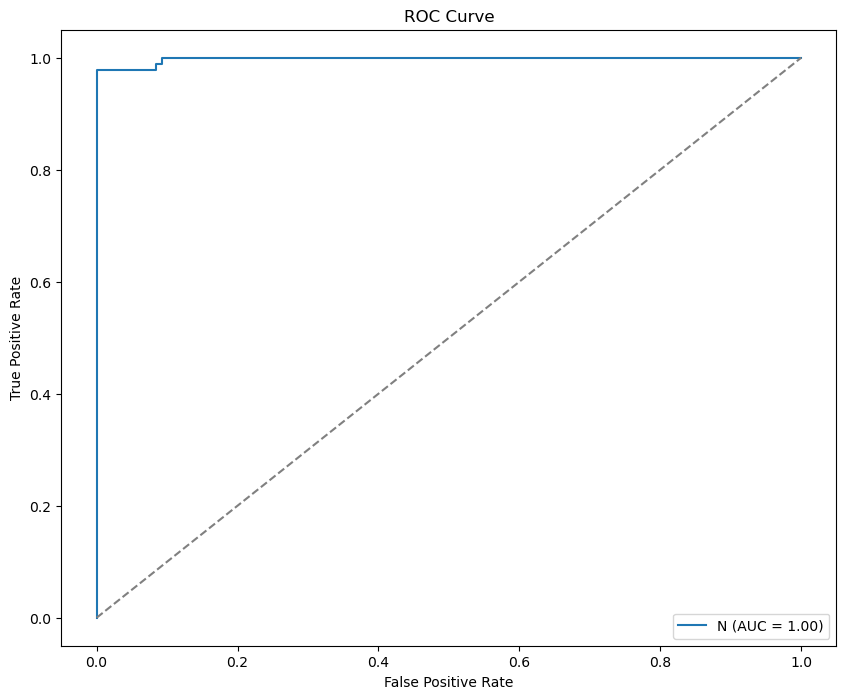

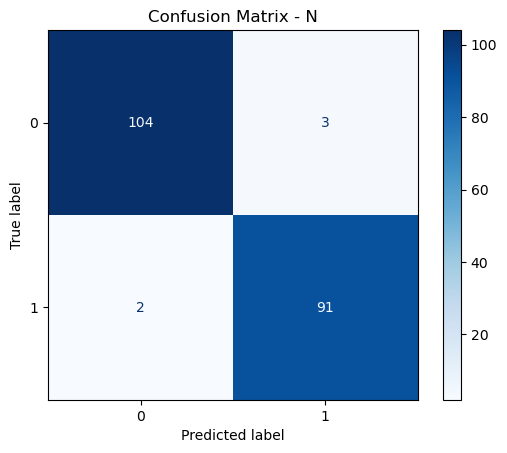

Model: N
Accuracy: 0.9750
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       107
           1       0.97      0.98      0.97        93

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200





In [64]:

# Train Neural Network model
nn = MLPClassifier(random_state=42, max_iter=1000)
nn.fit(X_train, y_train)
# Add Neural Network model to the list
new_models = [log_reg, rf, gb, svm, xgboost, nn]

# Visualize the performance of all models
visualize_model_performance([nn], X_test, y_test, 'Neural Network')


## Building the ANN Model

In [54]:



# Initialize the ANN model
model = Sequential()

# Adding input layer and first hidden layer
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
# Adding second hidden layer
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the ANN Model
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_split=0.2)

Epoch 1/50


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8462 - loss: 0.3354 - val_accuracy: 0.9750 - val_loss: 0.1309
Epoch 2/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9784 - loss: 0.0627 - val_accuracy: 0.9688 - val_loss: 0.1278
Epoch 3/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9683 - loss: 0.0749 - val_accuracy: 0.9563 - val_loss: 0.1279
Epoch 4/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9823 - loss: 0.0394 - val_accuracy: 0.9625 - val_loss: 0.1181
Epoch 5/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9845 - loss: 0.0294 - val_accuracy: 0.9500 - val_loss: 0.1282
Epoch 6/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9915 - loss: 0.0209 - val_accuracy: 0.9500 - val_loss: 0.1404
Epoch 7/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9777 - loss: 0.0446 - val_accuracy: 0.9625 - val_loss: 0.1355
Epoch 8/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9916 - loss: 0.0294 - val_accuracy: 0.9563 - val_

In [55]:

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Generate classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Accuracy: 0.9750
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.95      0.97        93

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

Confusion Matrix:
[[107   0]
 [  5  88]]


In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,285 (20.65 KB)

 Trainable params: 1,761 (6.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,524 (13.77 KB)

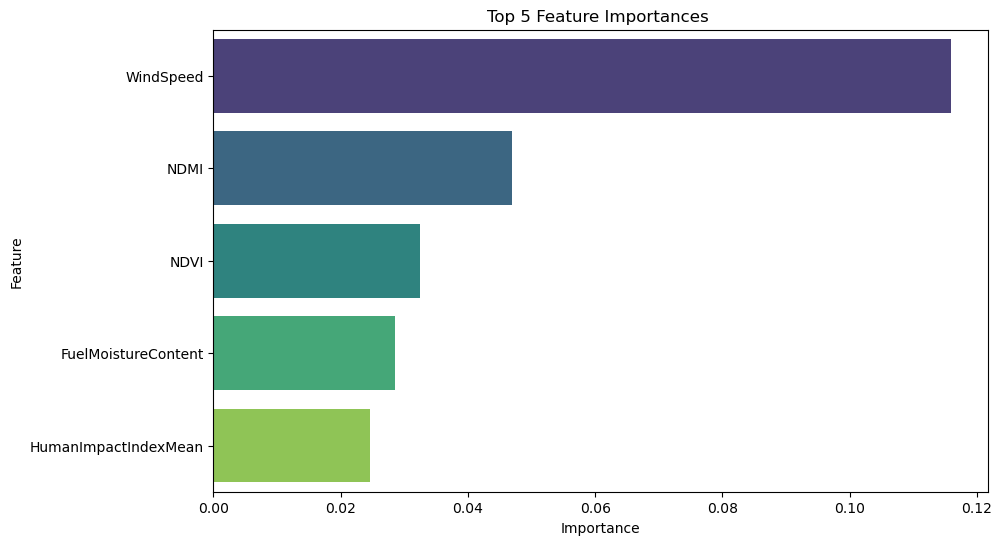

,Feature,Importance
11,WindSpeed,0.116000
3,NDMI,0.047000
4,NDVI,0.032500
15,FuelMoistureContent,0.028500
1,HumanImpactIndexMean,0.024667


In [65]:
# Get and plot the top features from Random Forest
top_features_nn = plot_permutation_importance(nn,X_test, y_test, X.columns, top_n=5)
top_features_nn